# UTILS

In [1]:
# optionally add scripts location to path
if True:
    import sys
    sys.path.append("../../../")
    sys.path.append("../")

import xopt
print(xopt.__version__)

data_dir = "/home/physics3/ml_tuning/20230813_LCLS2_Injector_new_emit"


2.0a1+19.g208c72e


In [2]:
from scripts.utils.image import ImageDiagnostic, ROI
diagnostic = ImageDiagnostic(
    screen_name = "OTRS:HTR:330",
    roi=ROI(xmin=0, xmax=100, ymin=0, ymax=100),
    testing=True
)

diagnostic.dump_yaml("otr_diagnostic.yml")


## (Optional) Measure background image

## reset point

In [3]:
# get reset point
from epics import caget_many, caput
result = caget_many(list(VARIABLE_RANGES.keys()))

NameError: name 'VARIABLE_RANGES' is not defined

In [ ]:
# get reset point
from epics import caget_many, caput
reset_dict = {
'SOLN:IN20:121:BCTRL': 0.4762021,
 'QUAD:IN20:121:BCTRL': 0.0078884391,
 'QUAD:IN20:122:BCTRL': -0.0019310605,
 'QUAD:IN20:361:BCTRL': -2.6188653,
 'QUAD:IN20:371:BCTRL': 2.1427768,
 'QUAD:IN20:425:BCTRL': 0.01,
 'QUAD:IN20:441:BCTRL': 0.5044999999999993,
 'QUAD:IN20:511:BCTRL': 2.7346698,
 'QUAD:IN20:525:BCTRL': -3.1
}

#for name, val in reset_dict.items():
#    caput(name, val)

## test measurement

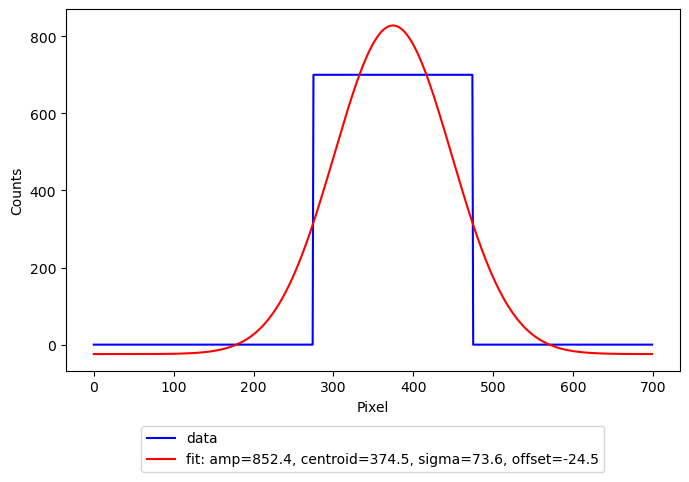

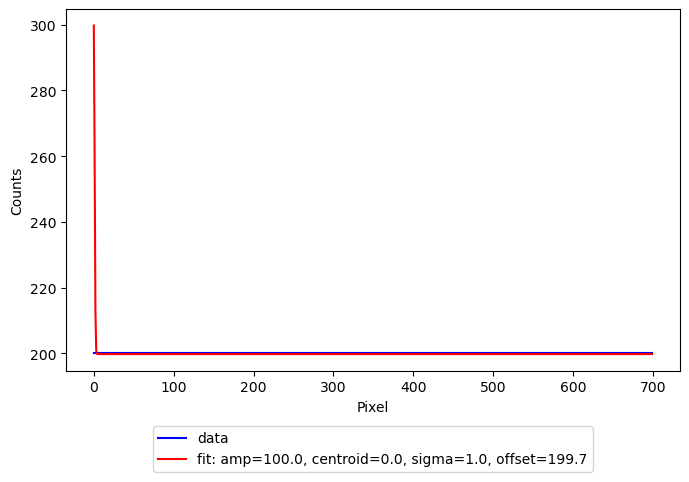

KeyError: 'log10_total_intensity'

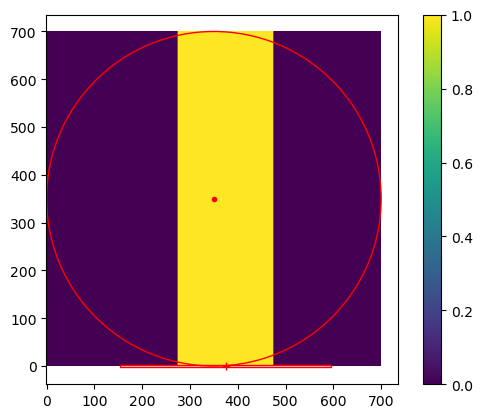

In [4]:
import pandas as pd
diagnostic.roi = ROI(xmin=600,xmax=1300,ymin=625, ymax=1325)
res = diagnostic.measure_beamsize(5)

pd.DataFrame(res)

In [ ]:
from scripts.utils.read_files import read_file
res = read_file(
    "/home/physics3/ml_tuning/20230813_LCLS2_Injector_new_emit/characterize_1/1691985207.1960971.h5"
)

In [ ]:
res

In [ ]:
plt.imshow(res["images"][0])